In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



In [2]:
df = pd.read_csv("processed.csv")
pd.set_option("display.max_columns", None)
df


,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,8.3,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,0,0
1,0.0,10.0,44.0,44.0,25.0,1010.6,1007.8,7.0,1.0,0,0
2,0.0,4.4,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,0,0
3,0.0,8.9,24.0,45.0,16.0,1017.6,1012.8,0.0,5.0,0,0
4,1.0,3.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,7.8,31.0,51.0,24.0,1024.6,1020.3,1.0,1.0,0,0
145456,0.0,13.5,22.0,56.0,21.0,1023.5,1019.1,8.0,5.0,0,0
145457,0.0,11.0,37.0,53.0,24.0,1021.0,1016.8,8.0,1.0,0,0
145458,0.0,13.2,28.0,51.0,24.0,1019.4,1016.5,3.0,2.0,0,0


In [3]:

# Drop any rows with missing values
df = df.dropna()

# Extract features and target variable
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier(early_stopping_rounds=10, verbosity=10)
model.fit(
    X_train, y_train,
    eval_set=[(X, y)],  # Validation set
    eval_metric='logloss',  # Evaluation metric
    
)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Info] Number of positive: 25457, number of negative: 90911
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.714960
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.161626
[LightGBM] [Debug] init for col-wise cost 0.002466 seconds, init for row-wise cost 0.001855 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 116368, number of used features: 10
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[Ligh

In [4]:
model = LGBMClassifier()

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

[LightGBM] [Info] Number of positive: 20365, number of negative: 72729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 93094, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218757 -> initscore=-1.272922
[LightGBM] [Info] Start training from score -1.272922
[LightGBM] [Info] Number of positive: 20365, number of negative: 72729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 93094, number of used features: 10
[LightGBM] [Info] 

In [5]:
model = LGBMClassifier()


y_scores = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')

y_scores_positive = y_scores[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_train, y_scores_positive)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

[LightGBM] [Info] Number of positive: 20365, number of negative: 72729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 93094, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218757 -> initscore=-1.272922
[LightGBM] [Info] Start training from score -1.272922
[LightGBM] [Info] Number of positive: 20365, number of negative: 72729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 93094, number of used features: 10
[LightGBM] [Info] 

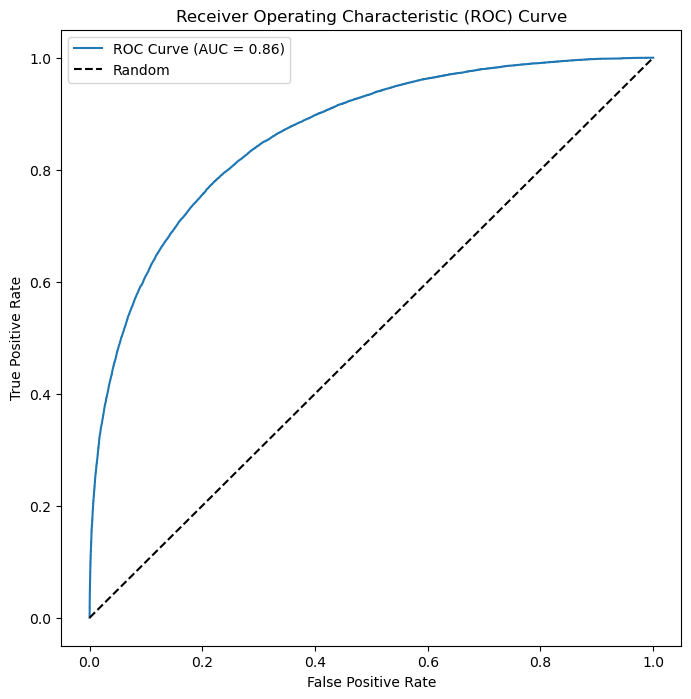

In [6]:
# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_train, y_scores_positive)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [7]:
with open('lgbm_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)